# Challenge 3:	Market Basket Analysis
- **Challenge**: Conduct a market basket analysis to uncover associations between products.
- **Deliverables**: A Jupyter Notebook with four different data exploration analysis' (summary table / bar chart / time series analysis / wordcloud), plus the implementation of the **APRIORI** algorithm and corresponding  visualization of the results. A presentation discussing the most common product associations and their potential impact on sales strategy.
- **Data Source**: [The "Groceries Dataset"](https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset) from Kaggle.

# 1. Obtain the Dataset
- Download the zip file from the "**Groceries Dataset**" from https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset
- Extract the file **Groceries_dataset.csv** into the same folder where the notebook is located.
- Explore the CSV using a text editor (like Notepad++) 

In [1]:
# hint: install Pyarrow library with "pip" to avoid the deprecation warning
import pandas as pd

# read the CSV file using pandas library to create a new dataframe (df)
df = pd.read_csv("Groceries_dataset.csv")

# duplicate the df to avoid the warning "A value is trying to be set on a copy of a slice from a DataFrame."
df = df.copy()

# print dataframe shape
print (df.shape)

#show top 10 data
df.head(10)

(38765, 3)


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
5,4941,14-02-2015,rolls/buns
6,4501,08-05-2015,other vegetables
7,3803,23-12-2015,pot plants
8,2762,20-03-2015,whole milk
9,4119,12-02-2015,tropical fruit


# 2. Data Cleaning
Before we can use the data, we need to preprocess it. This typically involves handling missing values, encoding categorical variables, and creating the RFM features.

In [2]:
# Check the columns data types. Are they all correct?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [3]:
# use "to_datetime" method of Pandas library to convert the "Date field" from "object" to to datetime
# the resulting dataframe should have the same column names, so you have to just convert the column type
# Hint: the original format is day-month-year which is not the common international format, so you should
# make sure that this format is kept into consideration when you convert the format from object ot datetime.

import pandas as pd
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-01-05,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-02-01,whole milk
...,...,...,...
38760,4471,2014-10-08,sliced cheese
38761,2022,2014-02-23,candy
38762,1097,2014-04-16,cake bar
38763,1510,2014-12-03,fruit/vegetable juice


In [4]:
# Data exploration: how many "Null" rows do we have? And Where?
pd.set_option('display.max_rows', None) # needed to display all columns
df.isnull().sum().sort_values(ascending=False)

Member_number      0
Date               0
itemDescription    0
dtype: int64

# 3. Data Exploration
Here are some suggested metrics to visualize:
1) Summary Statistics
2) Bar Chart: visualize the frequency of each item in the "itemDescription" column
3) Time Series Analysis: plot the number of purchases over time (e.g., daily, weekly, or monthly)
4) Word cloud: use the "itemDescription" column to visualize the most commonly occurring words

In [5]:
# 1) Summary Statistics:
# - Calculate basic summary statistics such as mean, median, mode, standard deviation, etc., for the numerical column "Member_number".
# - Compute summary statistics like count, unique items, top item, and frequency for the categorical columns "Date" and "itemDescription".

# Hint: you may calculate individual metrics or you may leverage higher level functions associated to Pandas dataframes

# Summary statistics for the numerical column "Member_number": count, mean, std, min, max, quartiles
numeric_stats = df['Member_number'].describe()
print(f"Summary Statistics for 'Member_number':\n{numeric_stats}\n")

# Summary statistics for the column "Date" and "itemDescription": count, unique vales, top, frequency
date_stats = df['Date'].describe()  
item_desc_stats = df['itemDescription'].describe()

print(f"Summary Statistics for 'Date':\n{date_stats}\n")  
print(f"Summary Statistics for 'itemDescription':\n{item_desc_stats}")

Summary Statistics for 'Member_number':
count    38765.000000
mean      3003.641868
std       1153.611031
min       1000.000000
25%       2002.000000
50%       3005.000000
75%       4007.000000
max       5000.000000
Name: Member_number, dtype: float64

Summary Statistics for 'Date':
count                            38765
mean     2015-01-09 18:17:12.498387712
min                2014-01-01 00:00:00
25%                2014-07-12 00:00:00
50%                2015-01-21 00:00:00
75%                2015-07-10 00:00:00
max                2015-12-30 00:00:00
Name: Date, dtype: object

Summary Statistics for 'itemDescription':
count          38765
unique           167
top       whole milk
freq            2502
Name: itemDescription, dtype: object


Here are the 167 unique items:


itemDescription
whole milk                   2502
other vegetables             1898
rolls/buns                   1716
soda                         1514
yogurt                       1334
root vegetables              1071
tropical fruit               1032
bottled water                 933
sausage                       924
citrus fruit                  812
pastry                        785
pip fruit                     744
shopping bags                 731
canned beer                   717
bottled beer                  687
whipped/sour cream            662
newspapers                    596
frankfurter                   580
brown bread                   571
pork                          566
domestic eggs                 566
butter                        534
fruit/vegetable juice         518
beef                          516
curd                          514
margarine                     491
coffee                        476
frozen vegetables             425
chicken                       42

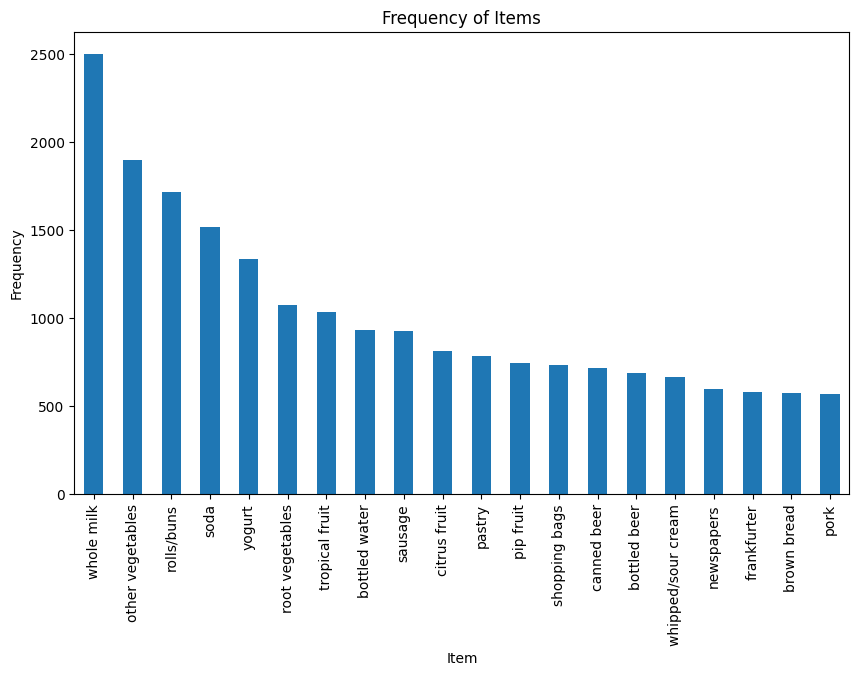

In [6]:
# 2) Bar Chart: visualize the frequency of each item in the "itemDescription" column
# - first just print a table with the count for each unique element
# - specify how manu unique elements we have
# - then use the matplotlib library to plot the first the top 20 items

import pandas as pd  
import matplotlib.pyplot as plt

# Calculate the frequency of each item  
item_freq = df['itemDescription'].value_counts()
print(f"Here are the {len(item_freq)} unique items:")
display(item_freq)
  
# Plotting the bar chart  
plt.figure(figsize=(10, 6))  # Set the figure size  
item_freq[:20].plot(kind='bar')  # Plotting the bar chart  
plt.title('Frequency of Items')  # Add a title to the chart  
plt.xlabel('Item')  # Add labels to the x-axis  
plt.ylabel('Frequency')  # Add labels to the y-axis  
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability  
plt.show()  # Display the chart  

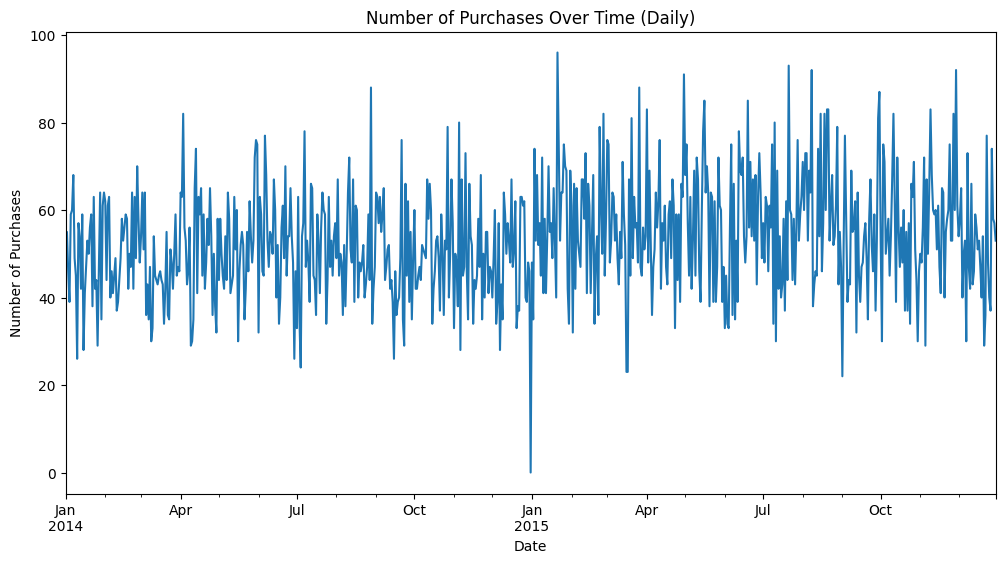

In [7]:
# 3) Time Series Analysis: plot the number of purchases over time (e.g., daily, weekly, or monthly)
# - The key task here is to resample the data on a daily basis and count the number of purchases for each day
# - Hint #1: do not modify the original dataframe: duplicate it with the copy() method before resampling
# - Hint #2: resampling requires the promotion of a field to be the dataframe "index". This field type must be datetime. 

import pandas as pd  
import matplotlib.pyplot as plt
  
# Set the 'Date' column as the index
df2 = df.copy()
df2.set_index('Date', inplace=True)  
  
# Resample the data on a daily basis and count the number of purchases for each day  
daily_purchases = df2.resample('D').size()  
  
# Plotting the number of purchases over time  
plt.figure(figsize=(12, 6))  # Set the figure size  
daily_purchases.plot()  # Plotting the line chart  
plt.title('Number of Purchases Over Time (Daily)')  # Add a title to the chart  
plt.xlabel('Date')  # Add labels to the x-axis  
plt.ylabel('Number of Purchases')  # Add labels to the y-axis  
plt.show()  # Display the chart  

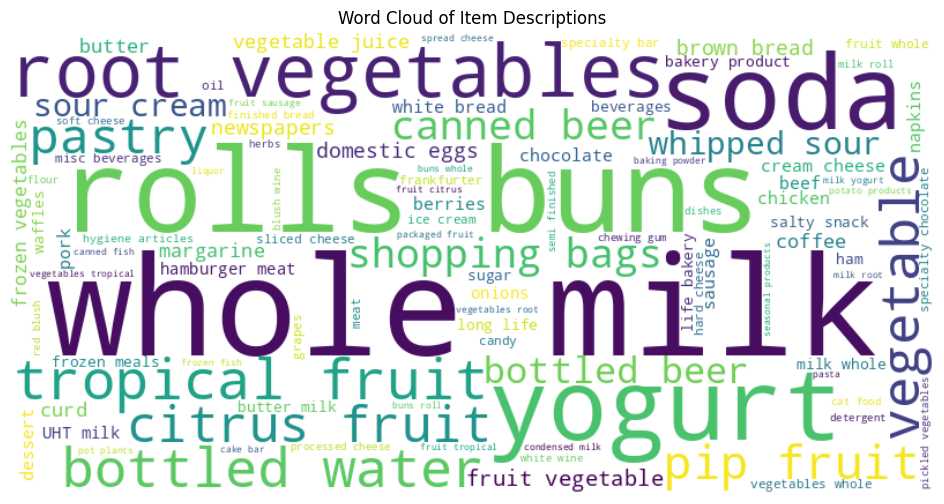

In [8]:
# 4) Word cloud: use the "itemDescription" column to visualize the most commonly occurring words
# this task requires the "wordcloud" library that you have to install
# hint #1: set figsize=(12, 6) to make it bigger enough
# hint #2: when calling plt.imshow choose "bilinear" interpolation, which is a commonly used method 
# for resampling an image to a different size or resolution
# hint #3: WordCloud requires to concatenate all item descriptions into a single string, separated by a space ' '. 
# hint #4: To concatenate the string elements of a list in a single string you may leverage the "join" method

import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
  
# Concatenate all item descriptions into a single string  
text = ' '.join(df['itemDescription'].values)
  
# Create a WordCloud object and generate the word cloud  
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(text)  
  
# Plot the word cloud
plt.figure(figsize=(12, 6))  # Set the figure size  
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Item Descriptions')  # Add a title to the chart  
plt.axis('off')  # Remove the axis labels  
plt.show()  # Display the chart  

## 4. Data Preprocessing
In order to use the "Apriori" algorithm requested, we need to convert the dataset into a "transactional format".<br/>
Here are the steps we perform to achieve this format:
- 4.1 Recap: review our "df" draframe
- 4.2 Convert the dataset into a "Transactional" format

- One-hot encoding is used to transform categorical data into a binary representation that can be easily interpreted by the algorithm. In the context of the "Groceries Dataset," the "itemDescription" column contains categorical data representing the products purchased. One-hot encoding converts each unique product into a separate column, where a value of 1 indicates that the product is present in a transaction, and 0 indicates that it is not.
- By performing one-hot encoding, the dataset is transformed into a binary matrix where each row represents a transaction, and each column represents a unique item. This format allows the Apriori algorithm to identify frequent itemsets, which are sets of items that occur together frequently, and generate association rules that describe the relationships between these items.

Note that one-hot encoding can result in a sparse matrix, where most of the values are zero. However, the Apriori algorithm efficiently handles such sparse datasets.

### 4.1 Recap: review our "df" draframe

In [9]:
# Here is the dataframe filtered by Member_number==1000
# As we can see, there are 13 records associated with 5 unique dates

df[df["Member_number"]==1000].sort_values('Date')

,Member_number,Date,itemDescription
13331,1000,2014-06-24,whole milk
29480,1000,2014-06-24,pastry
32851,1000,2014-06-24,salty snack
4843,1000,2015-03-15,sausage
8395,1000,2015-03-15,whole milk
20992,1000,2015-03-15,semi-finished bread
24544,1000,2015-03-15,yogurt
1629,1000,2015-05-27,soda
17778,1000,2015-05-27,pickled vegetables
2047,1000,2015-07-24,canned beer


In [10]:
# This is the confirmation that 5 dates are associated to 13 items
# In other words, the Member 1000 made 5 orders, called "transactions"

df[df["Member_number"]==1000].groupby(['Date']).count()

,Member_number,itemDescription
Date,,
2014-06-24,3,3
2015-03-15,4,4
2015-05-27,2,2
2015-07-24,2,2
2015-11-25,2,2


### 4.2 Convert the dataset into a "Transactional" format
As shown in the previous cell, a "transaction" is defined as a unique combination of ***Member_number*** and ***Date***, together with the corresponding items bought by that member on that day.<br/>
In other words, with a transactional format each row represents a *transaction*, and the columns represent the items that are present in that transaction.<br/>
As a result, each cell in the table indicates whether an item is present in a transaction or not. This format is suitable for finding frequent itemsets and generating association rules.

In [11]:
# In order to find correlations between items bought, we need to transform our data  
# into a format where each row represents a transaction and each column represents an item.

# Here we create a basket where each row is a transaction and each item has a binary value:
# 1 means that the items is present in transaction, 0 for absent.  

# The result confirms that we have 5 transactions for the member 1000; we can't easily see the 13 items bought
# because there are 167 columns in the dataframe, but as an example we see that rows 1 and 2 have "whole milk" equal to 1

pd.set_option('display.max_columns', None) # needed to display all columns

df_basket = (df  
          .groupby(['Member_number', 'Date', 'itemDescription'])['itemDescription']  
          .count().unstack().reset_index().fillna(0)  
          .set_index(['Member_number', 'Date']))

df_basket.head()

itemDescription           Instant food products  UHT-milk  abrasive cleaner  \
Member_number Date                                                            
1000          2014-06-24                    0.0       0.0               0.0   
              2015-03-15                    0.0       0.0               0.0   
              2015-05-27                    0.0       0.0               0.0   
              2015-07-24                    0.0       0.0               0.0   
              2015-11-25                    0.0       0.0               0.0   

itemDescription           artif. sweetener  baby cosmetics  bags  \
Member_number Date                                                 
1000          2014-06-24               0.0             0.0   0.0   
              2015-03-15               0.0             0.0   0.0   
              2015-05-27               0.0             0.0   0.0   
              2015-07-24               0.0             0.0   0.0   
              2015-11-25               0.0             0.0   0.0   

itemDescription           baking powder  bathroom cleaner  beef  berries  \
Member_number Date                                                         
1000          2014-06-24            0.0               0.0   0.0      0.0   
              2015-03-15            0.0               0.0   0.0      0.0   
              2015-05-27            0.0               0.0   0.0      0.0   
              2015-07-24            0.0               0.0   0.0      0.0   
              2015-11-25            0.0               0.0   0.0      0.0   

itemDescription           beverages  bottled beer  bottled water  brandy  \
Member_number Date                                                         
1000          2014-06-24        0.0           0.0            0.0     0.0   
              2015-03-15        0.0           0.0            0.0     0.0   
              2015-05-27        0.0           0.0            0.0     0.0   
              2015-07-24        0.0           0.0            0.0     0.0   
              2015-11-25        0.0           0.0            0.0     0.0   

itemDescription           brown bread  butter  butter milk  cake bar  candles  \
Member_number Date                                                              
1000          2014-06-24          0.0     0.0          0.0       0.0      0.0   
              2015-03-15          0.0     0.0          0.0       0.0      0.0   
              2015-05-27          0.0     0.0          0.0       0.0      0.0   
              2015-07-24          0.0     0.0          0.0       0.0      0.0   
              2015-11-25          0.0     0.0          0.0       0.0      0.0   

itemDescription           candy  canned beer  canned fish  canned fruit  \
Member_number Date                                                        
1000          2014-06-24    0.0          0.0          0.0           0.0   
              2015-03-15    0.0          0.0          0.0           0.0   
              2015-05-27    0.0          0.0          0.0           0.0   
              2015-07-24    0.0          1.0          0.0           0.0   
              2015-11-25    0.0          0.0          0.0           0.0   

itemDescription           canned vegetables  cat food  cereals  chewing gum  \
Member_number Date                                                            
1000          2014-06-24                0.0       0.0      0.0          0.0   
              2015-03-15                0.0       0.0      0.0          0.0   
              2015-05-27                0.0       0.0      0.0          0.0   
              2015-07-24                0.0       0.0      0.0          0.0   
              2015-11-25                0.0       0.0      0.0          0.0   

itemDescription           chicken  chocolate  chocolate marshmallow  \
Member_number Date                                                    
1000          2014-06-24      0.0        0.0                    0.0   
              2015-03-15      0.0        0

In [12]:
# The columns in df_basket contain only 0.0 and 1.0 values, but they are float numbers
# So we can convert them into boolean format, which makes the operations much more efficient
# Again, the first two rows have "whole milk" equal to True

df_basket_binary = df_basket.astype(bool)
df_basket_binary.head()

itemDescription           Instant food products  UHT-milk  abrasive cleaner  \
Member_number Date                                                            
1000          2014-06-24                  False     False             False   
              2015-03-15                  False     False             False   
              2015-05-27                  False     False             False   
              2015-07-24                  False     False             False   
              2015-11-25                  False     False             False   

itemDescription           artif. sweetener  baby cosmetics   bags  \
Member_number Date                                                  
1000          2014-06-24             False           False  False   
              2015-03-15             False           False  False   
              2015-05-27             False           False  False   
              2015-07-24             False           False  False   
              2015-11-25             False           False  False   

itemDescription           baking powder  bathroom cleaner   beef  berries  \
Member_number Date                                                          
1000          2014-06-24          False             False  False    False   
              2015-03-15          False             False  False    False   
              2015-05-27          False             False  False    False   
              2015-07-24          False             False  False    False   
              2015-11-25          False             False  False    False   

itemDescription           beverages  bottled beer  bottled water  brandy  \
Member_number Date                                                         
1000          2014-06-24      False         False          False   False   
              2015-03-15      False         False          False   False   
              2015-05-27      False         False          False   False   
              2015-07-24      False         False          False   False   
              2015-11-25      False         False          False   False   

itemDescription           brown bread  butter  butter milk  cake bar  candles  \
Member_number Date                                                              
1000          2014-06-24        False   False        False     False    False   
              2015-03-15        False   False        False     False    False   
              2015-05-27        False   False        False     False    False   
              2015-07-24        False   False        False     False    False   
              2015-11-25        False   False        False     False    False   

itemDescription           candy  canned beer  canned fish  canned fruit  \
Member_number Date                                                        
1000          2014-06-24  False        False        False         False   
              2015-03-15  False        False        False         False   
              2015-05-27  False        False        False         False   
              2015-07-24  False         True        False         False   
              2015-11-25  False        False        False         False   

itemDescription           canned vegetables  cat food  cereals  chewing gum  \
Member_number Date                                                            
1000          2014-06-24              False     False    False        False   
              2015-03-15              False     False    False        False   
              2015-05-27              False     False    False        False   
              2015-07-24              False     False    False        False   
              2015-11-25              False     False    False        False   

itemDescription           chicken  chocolate  chocolate marshmallow  \
Member_number Date                                                    
1000          2014-06-24    False      False                  False   
              2015-03-15    

## 5. Calculate Item Sets
In the context of the Apriori algorithm, a **frequent item set** represents a collection of item sets that appear in transactions with a frequency greater than or equal to a specified minimum support threshold.<br/>
Here's a breakdown of the terms:
- **Itemset**: A collection of one or more items that may be found together in a transaction. For instance, {'bread', 'milk'} is an itemset containing two items.
- **Frequent Itemset**: An itemset that occurs together in transactions more frequently than a predefined minimum threshold. Frequency is typically measured in terms of support.

In [13]:
# Apply the Apriori algorithm to find frequent item sets
# Use min_support to set the threshold for considering an itemset frequent
# Here we have all the 750 item sets, order by descending frequency and filtered by frequnce >= 0.001

from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(df_basket_binary, min_support=0.001, use_colnames=True)
frequent_itemsets.sort_values('support', ascending=False)

,support,itemsets
146,0.157923,(whole milk)
90,0.122101,(other vegetables)
109,0.110005,(rolls/buns)
123,0.097106,(soda)
147,0.085879,(yogurt)
110,0.069572,(root vegetables)
139,0.067767,(tropical fruit)
10,0.060683,(bottled water)
115,0.060349,(sausage)
28,0.053131,(citrus fruit)


## 6. Calculate Association Rules

Each row calculated by the association_rules function represents a single rule derived from the Market Basket Analysis using the association rule learning method.<br/>
This rule suggests that there is a positive and stronger-than-chance relationship between customers buying 'sausage' and also buying 'whole milk' and 'yogurt' together, although the actual occurrence of this combination is quite rare in the dataset (since the support is only 0.147%).<br/>

Here's what each column signifies:
- **antecedents**: The item(s) that lead to the rule. In this case, it's 'sausage'.
- **consequents**: The item(s) that are associated with the antecedent. Here, it's a combination of 'whole milk' and 'yogurt'.
- **antecedent support**: The proportion of transactions that contain the antecedent(s). This value is 0.060349, which means that 'sausage' appears in about 6.03% of all transactions.
- **consequent support**: The proportion of transactions that contain the consequent(s). The support for 'whole milk' and 'yogurt' together is 0.011161, meaning they appear together in about 1.12% of all transactions.
- **support**: The support of the combined antecedent(s) and consequent(s). This value is 0.001470, which indicates that 'sausage', 'whole milk', and 'yogurt' appear together in 0.147% of transactions. **The support metric is used to quantify the significance of the itemset within the dataset.**
- **confidence**: The probability of seeing the consequent(s) in transactions given that those transactions also contain the antecedent(s). Here the confidence is 0.024363, suggesting that there's a 2.44% chance that transactions containing 'sausage' will also contain 'whole milk' and 'yogurt'.
- **lift**: The ratio of observed support to that expected if the antecedent and consequent were independent. A lift value greater than 1 suggests that the presence of the antecedent increases the likelihood of the consequent(s) occurring in the transaction. The lift of 2.182917 indicates that the likelihood of 'sausage', 'whole milk', and 'yogurt' being bought together is 2.18 times higher than if they were statistically independent.
- **leverage**: A measure of how much more often the antecedent and consequent occur together than expected if they were statistically independent. A leverage of 0.000797 suggests a slight increase above the expected frequency of occurrence for this rule.
- **conviction**: A metric that gauges the strength of implication of the rule. A higher conviction value means that it is more likely for the antecedent to imply the consequent. A conviction value of 1.013532 suggests that if 'sausage' is purchased, the likelihood of 'whole milk' and 'yogurt' being purchased together is 1.013532 times the likelihood if 'sausage' was not purchased.
- **zhangs_metric**: This is a measure to evaluate the rule's validity, with values ranging from -1 to 1. A positive value indicates a positive correlation, and the closer the score is to 1, the stronger the rule. In this case, a value of 0.576701 indicates a moderate to strong positive correlation between the antecedent and consequents.

In [14]:
# The association_rules function finds items that are frequently bought together  
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)  
  
# Display the top 10 itemsets with the highest lift  
rules.sort_values(by='lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
238,(sausage),"(whole milk, yogurt)",0.060349,0.011161,0.001470,0.024363,2.182917,0.000797,1.013532,0.576701
235,"(whole milk, yogurt)",(sausage),0.011161,0.060349,0.001470,0.131737,2.182917,0.000797,1.082219,0.548014
234,"(whole milk, sausage)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,0.000701,1.093681,0.481231
239,(yogurt),"(whole milk, sausage)",0.085879,0.008955,0.001470,0.017121,1.911760,0.000701,1.008307,0.521727
87,(citrus fruit),(specialty chocolate),0.053131,0.015973,0.001403,0.026415,1.653762,0.000555,1.010726,0.417500
86,(specialty chocolate),(citrus fruit),0.015973,0.053131,0.001403,0.087866,1.653762,0.000555,1.038081,0.401735
236,"(sausage, yogurt)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,0.000563,1.131541,0.384877
237,(whole milk),"(sausage, yogurt)",0.157923,0.005748,0.001470,0.009310,1.619866,0.000563,1.003596,0.454430
122,(tropical fruit),(flour),0.067767,0.009757,0.001069,0.015779,1.617141,0.000408,1.006118,0.409366
123,(flour),(tropical fruit),0.009757,0.067767,0.001069,0.109589,1.617141,0.000408,1.046969,0.385385
